In [85]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


#Used a function to get the adult dataframe
def get_df():
    headers=["age","workclass","fnlwgt","education", "education-num", "marital-status", "occupation","relationship",
         "race", "sex", "capital-gain", "captial-loss","hours-per-week","native-country","income"]

    adult_df = pd.read_csv("../week_06/adult.data", encoding_errors='ignore', delimiter = ' ', on_bad_lines='skip', names= headers )
    adult_df.drop(['education-num','occupation','capital-gain','captial-loss','fnlwgt','marital-status','native-country'], axis = 'columns', inplace=True)
    
    return adult_df

adult_df = get_df()

In [86]:
get_df()

,age,workclass,education,relationship,race,sex,hours-per-week,income
0,"39,","State-gov,","Bachelors,","Not-in-family,","White,","Male,","40,",<=50K
1,"50,","Self-emp-not-inc,","Bachelors,","Husband,","White,","Male,","13,",<=50K
2,"38,","Private,","HS-grad,","Not-in-family,","White,","Male,","40,",<=50K
3,"53,","Private,","11th,","Husband,","Black,","Male,","40,",<=50K
4,"28,","Private,","Bachelors,","Wife,","Black,","Female,","40,",<=50K
...,...,...,...,...,...,...,...,...
32556,"27,","Private,","Assoc-acdm,","Wife,","White,","Female,","38,",<=50K
32557,"40,","Private,","HS-grad,","Husband,","White,","Male,","40,",>50K
32558,"58,","Private,","HS-grad,","Unmarried,","White,","Female,","40,",<=50K
32559,"22,","Private,","HS-grad,","Own-child,","White,","Male,","20,",<=50K


In [87]:
def cleaning_data(adult_df):
    adult_df['sex'] = np.where(adult_df['sex'] == 'Male,', 1, 0)
    adult_df['income'] = np.where(adult_df['income'] == '<=50K', 1, 0)
    race_map = {'White,':1,'Black,':2,'Asian-Pac-Islander,':3,'Amer-Indian-Eskimo,':4,'Other,':5}
    adult_df['race'] = adult_df['race'].map(race_map)
    class_labels = LabelEncoder()
    adult_df['hours-per-week'] = class_labels.fit_transform(adult_df['hours-per-week'].values)
    adult_df['age'] = class_labels.fit_transform(adult_df['age'].values)
    adult_df['workclass'] = class_labels.fit_transform(adult_df['workclass'].values)
    adult_df['education'] = class_labels.fit_transform(adult_df['education'].values)
    #adult_df['marital-status'] = class_labels.fit_transform(adult_df['marital-status'].values)
    adult_df['relationship'] = class_labels.fit_transform(adult_df['relationship'].values)
    adult_df['race'] = class_labels.fit_transform(adult_df['race'].values)
    #adult_df['native-country'] = class_labels.fit_transform(adult_df['native-country'].values)
    return adult_df

In [88]:
cleaning_data(adult_df)   

,age,workclass,education,relationship,race,sex,hours-per-week,income
0,22,7,9,1,0,1,34,1
1,33,6,9,0,0,1,4,1
2,21,4,11,1,0,1,34,1
3,36,4,1,0,1,1,34,1
4,11,4,9,5,1,0,34,1
...,...,...,...,...,...,...,...,...
32556,10,4,7,5,0,0,31,1
32557,23,4,11,0,0,1,34,0
32558,41,4,11,4,0,0,34,1
32559,5,4,11,3,0,1,12,1


<Axes: >

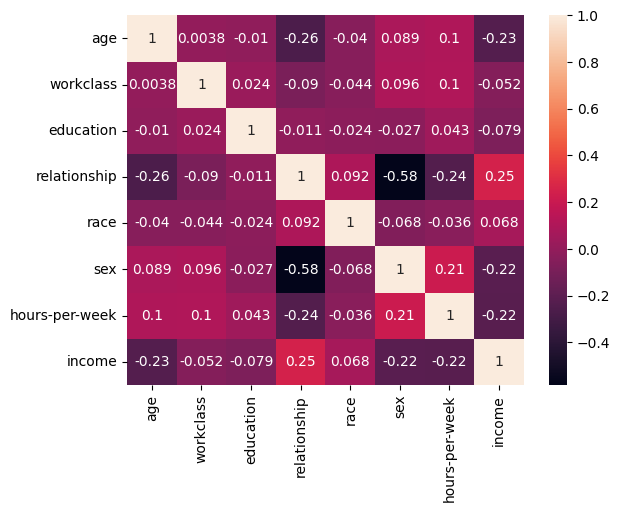

In [89]:
correlation = adult_df.corr()
sns.heatmap(correlation, annot=True)

In [90]:
def log_regression(adult_df):
    X = adult_df.drop('income', axis=1)
    y = adult_df['income']

   #train test split - cross validation
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,
                                                    random_state=32,
                                                    stratify=y)

    model = LogisticRegression(random_state=32).fit(X_train, y_train)

    #predicted outcome
    y_predicted = model.predict(X_test)

    print(model.score(X_test,y_test))
    ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

    svd = TruncatedSVD(n_components=6)
    # singular value decomposition = factorization technique for real or comple numbers
    # in a matrix
    # in short, it is untangling patterns in the numbers using matrix decomposition (linear algebra concept)

    X_train_svd = svd.fit_transform(X_train)
    X_test_svd = svd.fit_transform(X_test)

    model = LogisticRegression(random_state=32).fit(X_train_svd, y_train)

    model.score(X_test_svd, y_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test_svd, y_test)



0.7602620534343331


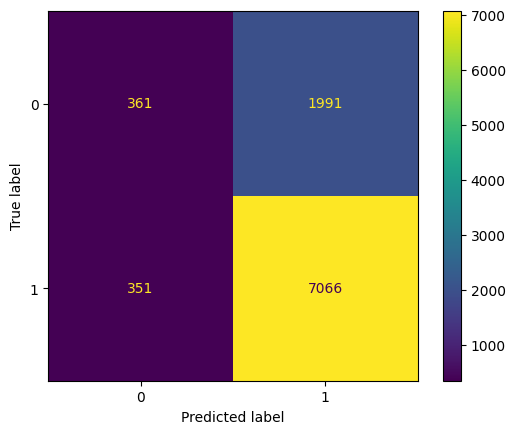

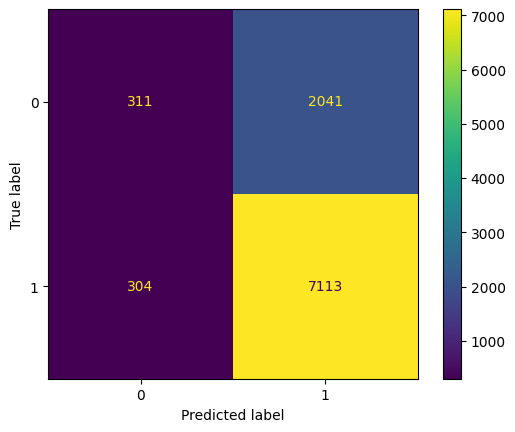

In [91]:
log_regression(adult_df)

In [92]:
def log_regression(adult_df):
    X = adult_df.drop('income', axis=1)
    y = adult_df['income']

   #train test split - cross validation
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,
                                                    random_state=32,
                                                    stratify=y)

    model = LogisticRegression(random_state=32).fit(X_train, y_train)
    steps = [('pca', PCA(n_components=7)), ('m', LogisticRegression())]
    model = Pipeline(steps=steps)
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [93]:
log_regression(adult_df)

Accuracy: 0.762 (0.005)
